<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>


# <!-- TITLE --> [BHPD1] - Regression with a Dense Network (DNN)
<!-- DESC --> Simple example of a regression with the dataset Boston Housing Prices Dataset (BHPD)
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Predicts **housing prices** from a set of house features. 
 - Understanding the **principle** and the **architecture** of a regression with a **dense neural network**  


The **[Boston Housing Prices Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)** consists of price of houses in various places in Boston.  
Alongside with price, the dataset also provide theses informations : 

 - CRIM: This is the per capita crime rate by town
 - ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
 - INDUS: This is the proportion of non-retail business acres per town
 - CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
 - NOX: This is the nitric oxides concentration (parts per 10 million)
 - RM: This is the average number of rooms per dwelling
 - AGE: This is the proportion of owner-occupied units built prior to 1940
 - DIS: This is the weighted distances to five Boston employment centers
 - RAD: This is the index of accessibility to radial highways
 - TAX: This is the full-value property-tax rate per 10,000 dollars
 - PTRATIO: This is the pupil-teacher ratio by town
 - B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
 - LSTAT: This is the percentage lower status of the population
 - MEDV: This is the median value of owner-occupied homes in 1000 dollars
## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## Step 1 - Import and init

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,sys

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('BHPD1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.6
Notebook id          : BHPD1
Run time             : Tuesday 26 January 2021, 16:11:04
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data

### 2.1 - Option 1  : From Keras
Boston housing is a famous historic dataset, so we can get it directly from [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)  

In [2]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)

### 2.2 - Option 2 : From a csv file
More fun !

In [3]:
data = pd.read_csv(f'{datasets_dir}/BHPD/origine/BostonHousing.csv', header=0)

display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Missing Data :  0   Shape is :  (506, 14)


## Step 3 - Preparing the data
### 3.1 - Split data
We will use 70% of the data for training and 30% for validation.  
The dataset is **shuffled** and shared between **learning** and **testing**.  
x will be input data and y the expected output

In [4]:
# ---- Suffle and Split => train, test
#
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv']
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']

print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


### 3.2 - Data normalization
**Note :** 
 - All input data must be normalized, train and test.  
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  
 - But test data should not be used in any way, even for normalization.  
 - The mean and the standard deviation will therefore only be calculated with the train data.

In [5]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.50,11.36,11.24,0.06,0.55,6.27,67.85,3.83,9.85,412.78,18.54,355.69,12.42
std,7.58,23.21,6.90,0.24,0.11,0.69,28.62,2.12,8.87,171.42,2.11,93.20,6.98
min,0.01,0.00,0.74,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,2.52,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.88,42.50,2.11,4.00,279.50,17.40,374.71,6.92
50%,0.27,0.00,9.69,0.00,0.54,6.20,76.35,3.28,5.00,332.00,19.10,391.26,10.81
75%,3.85,12.50,18.10,0.00,0.62,6.59,93.90,5.19,24.00,666.00,20.20,396.10,16.44
max,67.92,95.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.46,-0.49,-1.52,-0.26,-1.48,-3.91,-2.27,-1.27,-1.00,-1.32,-2.81,-3.79,-1.53
25%,-0.45,-0.49,-0.88,-0.26,-0.91,-0.56,-0.89,-0.81,-0.66,-0.78,-0.54,0.20,-0.79
50%,-0.43,-0.49,-0.22,-0.26,-0.15,-0.10,0.30,-0.26,-0.55,-0.47,0.27,0.38,-0.23
75%,0.05,0.05,0.99,-0.26,0.63,0.46,0.91,0.64,1.60,1.48,0.79,0.43,0.58
max,8.50,3.60,2.39,3.88,2.80,3.62,1.12,3.91,1.60,1.74,1.64,0.44,3.66


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
366,0.03,-0.49,0.99,-0.26,1.46,-1.89,0.82,-0.98,1.60,1.48,0.79,-0.43,0.23
410,6.29,-0.49,0.99,-0.26,0.39,-0.74,1.12,-1.14,1.60,1.48,0.79,-3.79,-0.33
375,2.13,-0.49,0.99,-0.26,1.04,1.51,1.05,-1.18,1.60,1.48,0.79,0.44,0.15
176,-0.45,-0.49,-1.04,-0.26,-0.37,-0.36,-0.72,-0.13,-0.55,-0.68,-0.92,0.40,-0.33
16,-0.32,-0.49,-0.45,-0.26,-0.13,-0.48,-1.35,0.32,-0.66,-0.62,1.16,0.33,-0.84


## Step 4 - Build a model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [6]:
  def get_model_v1(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))
    model.add(keras.layers.Dense(1, name='Output'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

## Step 5 - Train the model
### 5.1 - Get it

In [7]:
model=get_model_v1( (13,) )

model.summary()

# img=keras.utils.plot_model( model, to_file='./run/model.png', show_shapes=True, show_layer_names=True, dpi=96)
# display(img)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 32)                448       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                2112      
_________________________________________________________________
Dense_n3 (Dense)             (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


### 5.2 - Train it

In [8]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         = 0,
                    validation_data = (x_test, y_test))

## Step 6 - Evaluate
### 6.1 - Model evaluation
MAE =  Mean Absolute Error (between the labels and predictions)  
A mae equal to 3 represents an average error in prediction of $3k.

In [9]:
score = model.evaluate(x_test, y_test, verbose=1)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

1/5 [=====>........................] - ETA: 0s - loss: 6.2177 - mae: 1.8198 - mse: 6.2177

5/5 [==============================] - 0s 997us/step - loss: 11.7336 - mae: 2.4627 - mse: 11.7336


x_test / loss      : 11.7336
x_test / mae       : 2.4627
x_test / mse       : 11.7336


### 6.2 - Training history
What was the best result during our training ?

In [10]:
df=pd.DataFrame(data=history.history)
display(df)

,loss,mae,mse,val_loss,val_mae,val_mse
0,546.501648,21.400967,546.501648,465.286896,18.893841,465.286896
1,333.261688,15.736939,333.261688,178.081146,11.199280,178.081146
2,92.189484,7.714386,92.189484,66.455177,6.404411,66.455177
3,47.795799,5.332153,47.795799,38.935852,4.784885,38.935852
4,31.799364,4.205872,31.799364,29.168701,4.076880,29.168701
5,25.312704,3.694782,25.312704,25.718102,3.831998,25.718102
6,21.723017,3.256412,21.723017,22.856766,3.684694,22.856768
7,19.357492,2.998815,19.357492,19.663109,3.397294,19.663109
8,17.452042,2.871153,17.452042,18.723410,3.281952,18.723410
9,16.290012,2.751398,16.290012,17.254560,3.134544,17.254560


In [11]:
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.4535


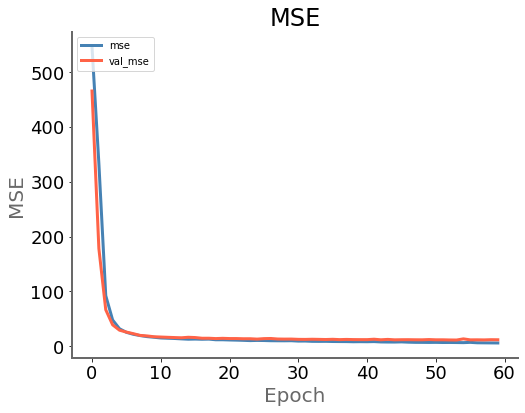

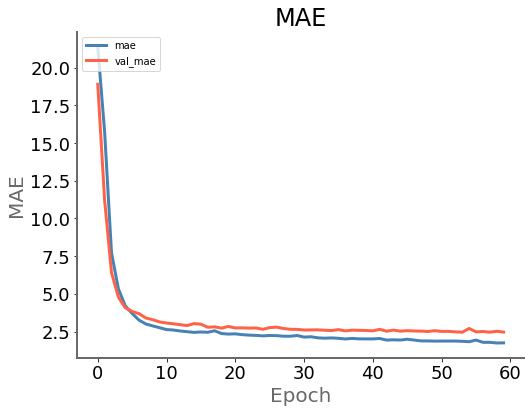

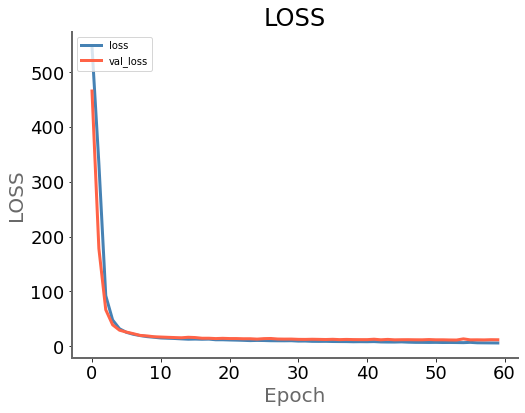

In [12]:
pwk.plot_history(history, plot={'MSE' :['mse', 'val_mse'],
                                'MAE' :['mae', 'val_mae'],
                                'LOSS':['loss','val_loss']}, save_as='01-history')

## Step 7 - Make a prediction
The data must be normalized with the parameters (mean, std) previously used.

In [13]:
my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [14]:

predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

Prediction : 10.58 K$
Reality    : 10.40 K$


In [15]:
pwk.end()

End time is : Tuesday 26 January 2021, 16:11:09
Duration is : 00:00:06 765ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>